### Madden-Julian Oscillation (MJO) Metrics

This notebook demonstrates the basic use of the MJO metrics driver. It is assumed that you have run the download notebook to acquire the sample data before running this demo.

Scientific information about the MJO metrics is available through the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/mjo).

First we load the demo directory choices:

In [3]:
from user_choices import demo_data_directory, demo_output_directory

The `--help` flag is available to provide more information on the mjo_metrics_driver:

In [11]:
%%bash
mjo_metrics_driver.py --help

usage: mjo_metrics_driver.py [-h] [--parameters PARAMETERS]
                             [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                             [--results_dir RESULTS_DIR]
                             [--reference_data_path REFERENCE_DATA_PATH]
                             [--modpath MODPATH] [--mip MIP] [--exp EXP]
                             [--frequency FREQUENCY] [--realm REALM]
                             [--reference_data_name REFERENCE_DATA_NAME]
                             [--reference_data_lf_path REFERENCE_DATA_LF_PATH]
                             [--modpath_lf MODPATH_LF] [--varOBS VAROBS]
                             [--varModel VARMODEL]
                             [--ObsUnitsAdjust OBSUNITSADJUST]
                             [--ModUnitsAdjust MODUNITSADJUST] [--units UNITS]
                             [--osyear OSYEAR] [--msyear MSYEAR]
                             [--oeyear OEYEAR] [--meyear MEYEAR]
                             [--modnames 

### Basic Use

The MJO driver can read a parameter file to load user settings. A basic parameter file is shown here:

In [ ]:
with open("basic_mjo_param.py") as f:
    print(f.read())

This parameter file can be passed to the mjo driver via the command line:
```
mjo_metrics_driver.py -p basic_mjo_param.py
```

This example is run as a subprocess in the next cell.

In [ ]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py

### Command line arguments

It is also possible to use the command line to pass other arguments to the MJO driver. The command line arguments will override the settings in the parameter file.

In these example, we change a few different things. The new `case_id` will show up as a new folder in the result directory because of how the `result_dir` variable is set in the parameter file. NetCDF output and plots will be saved. The analysis start and end years for the models are changed to match the observations.

The `includeOBS` flag means that results will also be generated for observations, while the `no_OBS` flag excludes observations.

In [6]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py \
--case_id 'Ex2' \
--no_OBS \
--nc_out 'True' \
--plot 'True' \
--msyear 2000 \
--meyear 2005

includeOBS: False
models: ['ACCESS1-0']
realization:  r1i1p1
demo_output/mjo/Ex2
demo_output/mjo/Ex2
demo_output/mjo/Ex2
CMEC: False
debug:  False
parallel: False
 -----  ACCESS1-0  ---------------------


A png image is created showing the wavenumber-frequency power spectra.

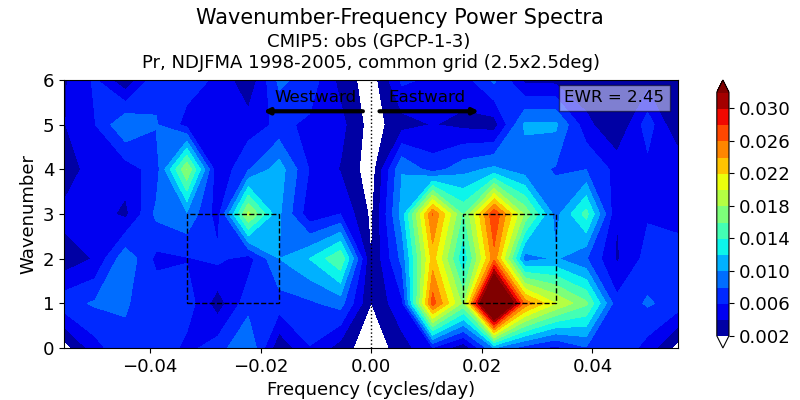

In [10]:
from IPython.display import Image
Image(filename=demo_output_directory+"/mjo/Ex2/cmip5_obs_historical_GPCP-1-3_mjo_1998-2005_cmmGrid.png")